# Estimating Probabilities using Frequentist vs. Bayesian Inference: Coin Toss


We want to determine if a coin is fair using a sequence of observed coin tosses. 
The coin can show H (head) and T (tail). We use $P(H)$ to represent the probability that the coin lands head up and $P(T)$ 
for the probability that the coin lands tail up. We call the true $P(H)$ the parameter $\theta$ which also means that
$P(T) = 1 - \theta$. A fair coin would show on average 50\% head, i.e., it would have $\theta = .5$. 

Let's assume we have a slightly unfair coin with $\theta = 0.6$, but this is unknown and all we have access to are outcomes of coin tosses. 
We can use observations to estimate the parameter $\hat{\theta}$ and then detemine if it is (close to) $.5$.

In [1]:
import numpy as np
np.random.seed(1234)

theta = 0.6
n = 100

tosses = np.random.choice([1, 0], size=n, p=[theta, 1-theta])
tosses

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

## Frequentist Approach

[Frequentist probabilities](https://en.wikipedia.org/wiki/Frequentist_probability) are long-run averages estimated from count frequencies: 

$$P(H) = \lim_{n\to\infty} \frac{n_H}{n}$$

However, since we only have a limited number of tosses, we can only estimate the probability as:

$$\hat{P}(H) = \hat{\theta} = \frac{n_H}{n}$$

In [2]:
n_H = np.sum(tosses)

n_H/n

0.58

We would conclude that the coin seems to be biased towards heads and we would predict the next toss to be more likely to come out heads.

We can look at the frequentist estimate after each coin toss.

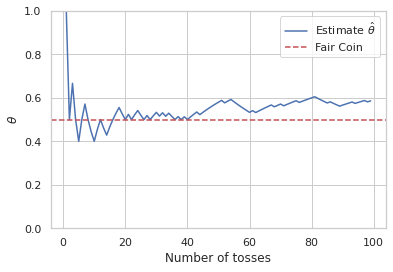

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid")

ns = np.arange(1, n)
thetas = [np.mean(tosses[:i]) for i in ns]
plt.plot(ns, thetas, label="Estimate $\\hat{\\theta}$")
plt.xlabel("Number of tosses")
plt.ylabel("$\\theta$")
plt.ylim([0, 1])
plt.axhline(y=0.5, color='r', linestyle="--", label="Fair Coin")
plt.legend()
plt.show()

We see that initially, it looks like the coin may be fair, but later on, the estimate tends to a value larger than .5, but how do we know if the coin is unfair?

### Confidence Intervals

Frequentists use [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) to determine a range around the point estimate. A 95\% confidence interval is defined as:

> The confidence level represents the long-run frequency of confidence intervals that contain the true value of the unknown population parameter. In other words, 95% of confidence intervals computed at the 95% confidence level contain the parameter, and likewise for other confidence levels.

Applied to coin tosses this means that we observe a single experiment with 100 coin tosses and compute the mean. 
Then we wonder in what range the means computed for many more experiments would fall. We call the distribution of these experimental means the *sampling distribution.* Given a user-specified *confidence level*  $1 - \alpha$ of let's say 95%, the *confidence interval* is the range in which 95% of the experimental means fall. Interestingly, we can estimate the confidence interval from data from a single experiment.


The most basic confidence interval uses a normal approximation to the sampling distribution (which is a good approximation for larger sample sizes of $n \ge 30$) and is calculated as:

$$\hat{\theta} \pm z\ \mathrm{SE}(\hat{\theta})$$

where $z$ is the critical value at a given confidence level drawn from a standard normal distribution. 
$\mathrm{SE}(\hat{\theta})$ is the standard deviation of the sampling distribution. It is often called the standard error (SE) and estimated using the sample variance $\sigma^2_{\hat{\theta}}$ as $\mathrm{SE}(\hat{\theta}) = \sqrt{\frac{\sigma^2_{\hat{\theta}}}{n}}$.

Let's construct a 95\% confidence interval for the estimate after 100 coin tosses.

In [4]:
from scipy.stats import norm

z = norm.ppf(1 - 0.05/2)
z

1.959963984540054

In [5]:
theta_hat = np.mean(tosses)
theta_hat

0.58

In [6]:
se = np.sqrt(np.var(tosses) / n)
se

0.04935585071701227

In [7]:
CI = [theta_hat - z * se, theta_hat + z * se]
CI

[0.4832643101683205, 0.6767356898316794]

The confidence interval covers .5 and we cannot conclude that the coin is not fair. Note that we would need to do also a t-test to get a definite answer. Let's look at the distribution for the confidence interval.

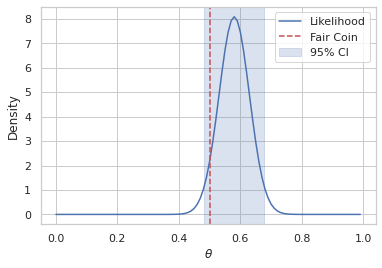

In [8]:
ps = np.arange(0, 1, step=0.01)
ls = [norm.pdf(p, loc = theta_hat, scale = se) for p in ps]
plt.plot(ps, ls, label="Likelihood")
plt.xlabel("$\\theta$")
plt.ylabel("Density")
plt.axvline(x=0.5, color='r', linestyle="--", label="Fair Coin")
plt.axvspan(CI[0], CI[1], color='b', alpha=.2, label="95% CI")
plt.legend()
plt.show()

Interpretation: If we perform many experiments of 100 coin tosses using a coin with the estimated parameter, then 95% of the experiments will result in parameter estimates between the two gray lines (the 95% confidence interval) including a parameter 0f .5. We can approximately reverse the argument saying that a fair coin may produce the observed parameter. If the confidence interval overlaps, then we would need to do a statistical test to determine statistical significance.  

We can ese `scipy` to calculate the normal approximation CI by calculating the 95% interval for the normal distribution with the location of the sample mean and the standard error estimate (`st.sem()`). 

In [9]:
import scipy.stats as st

st.norm.interval(alpha=0.95, loc=np.mean(tosses), scale=st.sem(tosses, ddof = 0))

(0.4832643101683205, 0.6767356898316794)

We can now add the confidence to the frequentist estimate after each coin toss. We see that it is initially very large and then gets reduced once we observe more data.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/conda/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


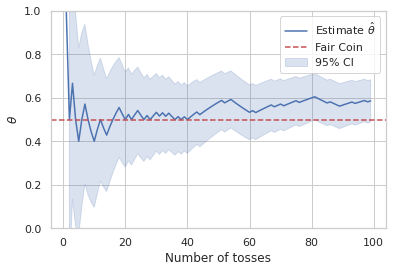

In [10]:
ns = np.arange(1, n)
thetas = [np.mean(tosses[:i]) for i in ns]
CI = [st.norm.interval(alpha=0.95, loc=np.mean(tosses[:i]), scale=st.sem(tosses[:i], ddof = 0)) for i in ns]
CI = list(zip(*CI))

plt.plot(ns, thetas, label="Estimate $\\hat{\\theta}$")
plt.fill_between(ns, CI[0], CI[1], color='b', alpha=.2, label="95% CI")
plt.axhline(y=0.5, color='r', linestyle="--", label="Fair Coin")
plt.xlabel("Number of tosses")
plt.ylabel("$\\theta$")
plt.ylim([0, 1])
plt.legend()
plt.show()

Note: The used normal approximation will be relatively unbiased for $n>30$ trials. Often, the standard error is estimated by using the unbiased estimate for the variance 
$\frac{1}{n+1} \sum x$ (`st.sem` with 1 degree of freedom) and a t-distribution with number of trials - 1 degrees of freedom (which approaches a normal as the degrees of freedom increase) is used. In Python this can be calculated with:

In [11]:
st.t.interval(alpha=0.95, df = len(tosses)-1,loc=np.mean(tosses), scale=st.sem(tosses, ddof = 1))

(0.4815739174219005, 0.6784260825780994)

### Additive Smoothing for Counts

[Additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) (also called Laplace smoothing) can be used to address issues with estimating probabilities with low counts or counts of zero. The smoothed estimator is for a probability of heads is

$$\hat{P}(H) = \hat{\theta} = \frac{n_H + \alpha}{n + 2\alpha}$$

$\alpha > 0$ is the smoothing parameter (sometimes called the pseudocount). Note that this can be seen as uninformative prior (Beta distribution with both parameters set to $\alpha$) as described in Bayesian inference below. Often $\alpha = 1$ is used.

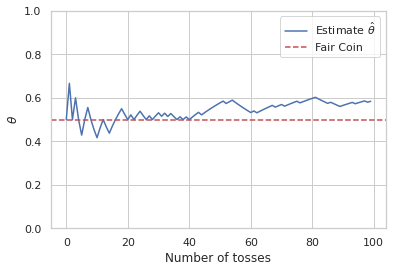

In [12]:
ns = np.arange(0, n)
thetas = [(np.sum(tosses[:i])+1)/(i+2) for i in ns]
plt.plot(ns, thetas, label="Estimate $\\hat{\\theta}$")
plt.xlabel("Number of tosses")
plt.ylabel("$\\theta$")
plt.ylim([0, 1])
plt.axhline(y=0.5, color='r', linestyle="--", label="Fair Coin")
plt.legend()
plt.show()

Note that we can now start with $n = 0$ tosses and get for $n_H = 0$ an estimate of $1/2 = .5$. 

## Bayesian Inference

[Bayesian probability](https://en.wikipedia.org/wiki/Bayesian_probability) is a measure of subjective belief that an individual has about the occurance of a particular 
event given all the information she has. The belief is updated with new evidence using Bayes rule:

$$P(\theta|D) = \frac{P(D|\theta) \; P(\theta)}{P(D)}$$

We call:
* $D$ the evidence and $P(D)$ is the unconditional probability that the event representing the evidence occurs.
* $P(\theta)$ is called the prior. This is our belief about $\theta$ before considering the evidence.
* $P(D|\theta)$ is called the likelihood. This is the probability of seeing the evidence $D$ if $\theta$ is the true parameter.
* $P(\theta|D)$ is the posterior. This is our belief about $\theta$ after taking the evidence $D$ into account. 

A short introduction can be found [here](https://www.thomasjpfan.com/2015/09/bayesian-coin-flips/).

### Likelihood

The evidence $D$ for coin tosses is how many heads and tails we get, denoted as $n_H$ and $n_T$, out for $n = n_H + n_T$ tries. Since each coin toss is an independent Bernoulli trial,
the number of heads follows a [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) and we can define the 
likelihood (probability of seeing $D$ given the parameter $\theta$) using the probability mass function (PMF) of the Binomial distribution as:

$$
P(D|\theta) = P(n_H, n | \theta) = {n \choose n_H} \theta^{n_H} (1 - \theta)^{n_T}
$$

### Prior belief

Note that the prior belief is not just a single parameter $\theta$, but it is a distribution over possible values of the parameter space giving different values of $\theta$ a probability $P(\theta)$. 
An uniformative prior would be a uniform distribution for $\theta$ in the interval $[0,1]$ indicating that each value of $\theta$ is equally likely. For Bayesian update, it is convenient to
use a prior distribution with the special property that multiplying it with the defined likelihood function 
provides a posterior distribution that is of the same family as the prior distribution. Such a prior distribution is called a conjugate prior
which leads to a closed-form expression for the posterior.

The conjugate prior for the above likelihood is the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution). The Beta distribution has the two parameters $\alpha > 0$ and $\beta > 0$.

$$P(\theta) = \frac{1}{B(\alpha, \beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}$$


$B(\alpha, \beta)$ is called the Beta function and produces a scaling factor calculated using gamma distributions.

The beta distribution is very flexible.

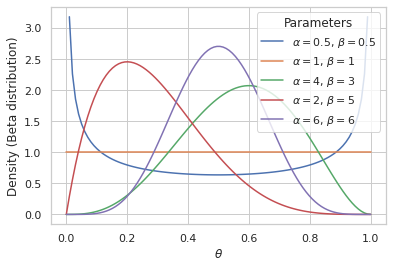

In [13]:
from scipy.stats import beta

x = np.linspace(0, 1, 100)
params = [
        (0.5, 0.5),
        (1, 1),
        (4, 3),
        (2, 5),
        (6, 6)
]
for p in params:
    y = beta.pdf(x, p[0], p[1])
    plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % p)
plt.xlabel("$\\theta$")
plt.ylabel("Density (Beta distribution)")
plt.legend(title="Parameters")
plt.show()

The expectation of a random variable $X \sim \mathrm{Beta}(\alpha, \beta)$ is given by (see [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)):

$$E(X) = \frac{\alpha}{\alpha + \beta} $$

### Probability of the Evidence

Since we know the distribution of the prior and the probability of the evidence given a prior, we can calculate the probability of the evidence with integration. The integration is easy because the 
chosen beta prior distribution is the conjugate prior to the binomial likelihood.  

$$P(D) = \int_0^1 P(D|\theta)P(\theta)\; d\theta = {n \choose n_H} \frac{B(n_H + \alpha, n_T + \beta)}{B(\alpha, \beta)}$$

### Posterior distribution

$$P(\theta|D) = \frac{P(D|\theta) \; P(\theta)}{P(D)} 
= \frac{\theta^{n_H} (1 - \theta)^{n_T} \theta^{\alpha - 1}\; (1 - \theta)^{\beta - 1} }{B(n_H + \alpha, n_T + \beta)}  
= \frac{1}{B(n_H + \alpha, n_T + \beta)}  \theta^{n_H + \alpha -1} (1 - \theta)^{n_T + \beta -1} 
$$

Which is again a beta distribution $P(\theta|D) \sim \mathrm{Beta}(n_H + \alpha, n_T + \beta)$.

The expectation of the posterior distribution is the estimate for the probability:

$$\hat{P}(H) = E(P(\theta|D)) = \frac{n_H + \alpha}{n_H + \alpha + n_T + \beta} = \frac{n_H + \alpha}{n + \alpha + \beta}$$

### Example data

Start with an uninformative prior and calculate the expected value. 

In [14]:
alpha_prior = 1
beta_prior = 1

alpha_prior / (alpha_prior + beta_prior)

0.5

Update the belief with the observed coin tosses and calculate the new expected value.

In [15]:
alpha_prior = 1
beta_prior = 1

n_H = np.sum(tosses)
n_T = n-n_H

alpha_posterior = n_H + alpha_prior
beta_posterior = n_T + beta_prior

alpha_posterior / (alpha_posterior + beta_posterior)

0.5784313725490197

Plot the posterior and the credible interval. The [credible interval](https://en.wikipedia.org/wiki/Credible_interval) is a Bayesian equivalent to the frequentist confidence interval and is computed using the posterior distribution.

In [16]:
CredI = st.beta.interval(.95, alpha_posterior, beta_posterior)
CredI

(0.48181820432866673, 0.6721301204468941)

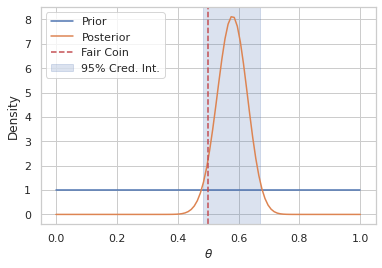

In [17]:
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), label = "Prior")
plt.plot(x, beta.pdf(x, alpha_posterior, beta_posterior), label = "Posterior")
plt.ylabel("Density")
plt.xlabel("$\\theta$")
plt.axvline(x=0.5, color='r', linestyle="--", label="Fair Coin")
plt.axvspan(CredI[0], CredI[1], color='b', alpha=.2, label="95% Cred. Int.")
plt.legend()
plt.show()

Plot the development of the expected value of the posterior distribution after each additional coin toss using two different priors, an uninformative prior with $\mathrm{Beta(1, 1)}$, a prior belief that the coin is most likely fair $\mathrm{Beta(6, 6)}$, and a prior belief that the coin is most likely unfair biased towards heads $\mathrm{Beta(4, 1)}$.

In [18]:
def show_estimates(tosses, title = "Uninformative Prior", alpha_prior = 1, beta_prior = 1):
    n = len(tosses)
    
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, alpha_prior, beta_prior)
    plt.plot(x, y, label=f"$\\alpha={alpha_prior}$, $\\beta={beta_prior}$")
    plt.xlabel("$\\theta$")
    plt.ylabel("Density (Beta distribution)")
    plt.legend(title="Parameters")
    plt.title(title)
    plt.show()
    
    ns = np.arange(0, n)
    alphas = [np.sum(tosses[:i]) for i in ns]
    betas = [np.subtract(i, np.sum(tosses[:i])) for i in ns]
    alphas = np.add(alphas, alpha_prior) 
    betas = np.add(betas, + beta_prior)
    expectations = alphas / (alphas + betas)
    CredI = st.beta.interval(.95, alphas, betas)

    plt.plot(ns, expectations, label = "Estimate $\hat{\\theta}$")
    plt.fill_between(ns, CredI[0], CredI[1], color='b', alpha=.2, label="95% Cred.Int.")
    plt.axhline(y=0.5, color='r', linestyle='--', label="Fair Coin")
    plt.xlabel("Number of tosses")
    plt.ylabel("$\\theta$")
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

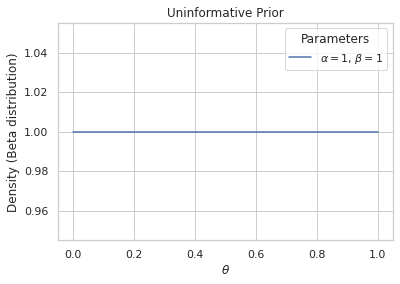

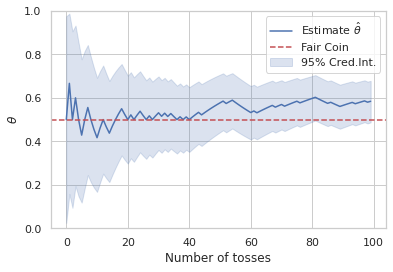

In [19]:
show_estimates(tosses, title = "Uninformative Prior", alpha_prior = 1, beta_prior = 1)

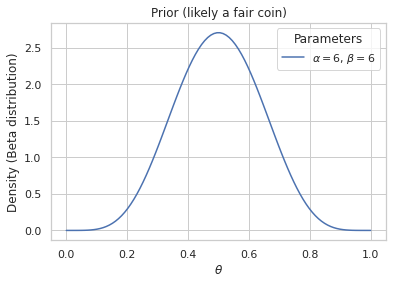

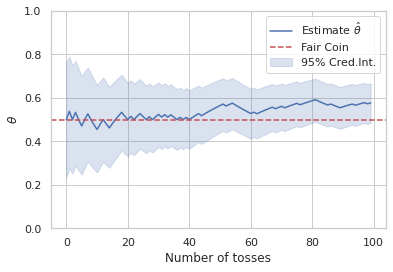

In [20]:
show_estimates(tosses, title = "Prior (likely a fair coin)", alpha_prior = 6, beta_prior = 6)

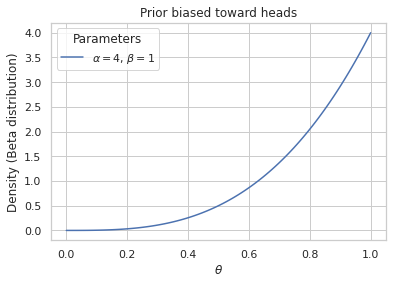

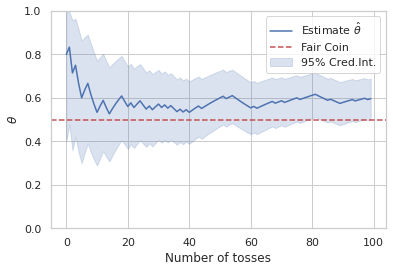

In [21]:
show_estimates(tosses, title = "Prior biased toward heads", alpha_prior = 4, beta_prior = 1)

If we start with $\alpha = 0$ and $\beta = 0$, which is not a valid Beta distribution, then we get an estimator that is very similar to the frequentist estimate. 

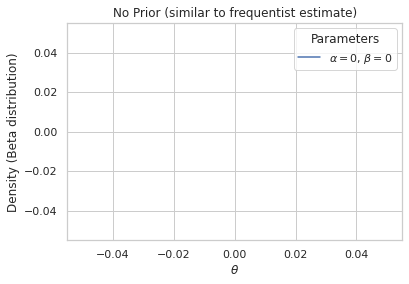

/tmp/ipykernel_1222/5219464.py:18: RuntimeWarning: invalid value encountered in true_divide
  expectations = alphas / (alphas + betas)


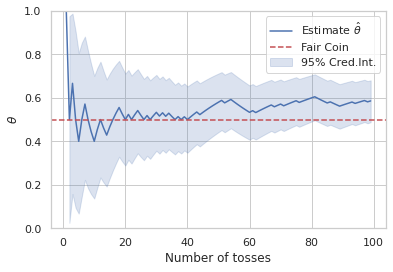

In [22]:
show_estimates(tosses, title = "No Prior (similar to frequentist estimate)", alpha_prior = 0, beta_prior = 0)